<a href="https://colab.research.google.com/github/23f2004548/DAILY-CODES/blob/main/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_index = pd.read_csv("economic_index.csv")

In [5]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [15]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace = True,errors='ignore')
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [17]:
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


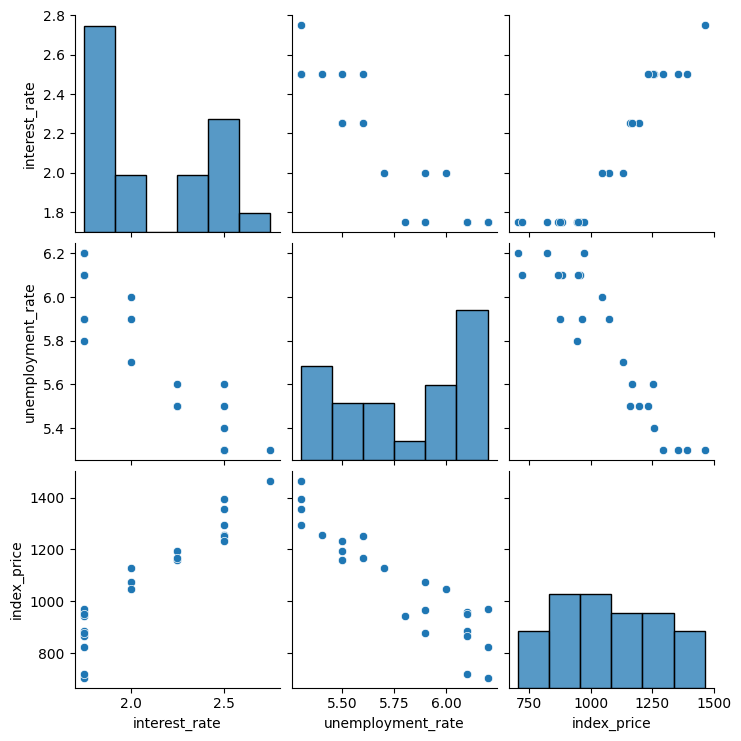

In [19]:
sns.pairplot(df_index)

In [20]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

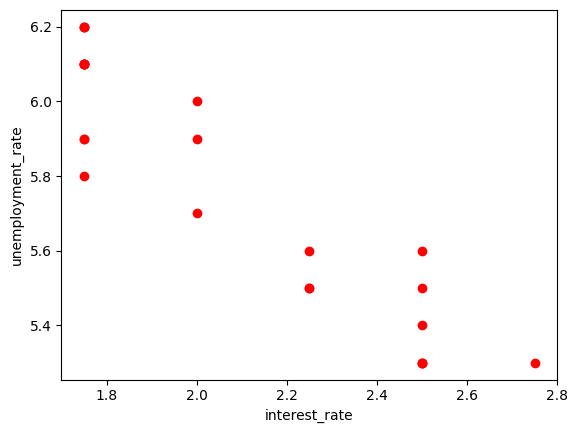

In [25]:
## vizulatizae the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [27]:
## independent and dependent feature
X= df_index.iloc[:,:-1]
y =df_index.iloc[:,-1]


In [28]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [29]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

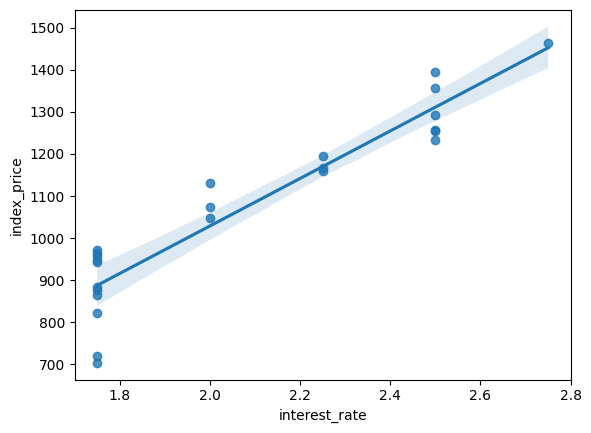

In [32]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

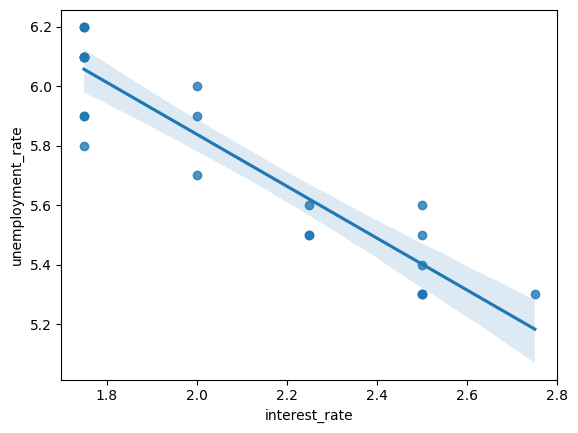

In [34]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [36]:
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [40]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error', cv=5)

In [41]:
np.mean(validation_score)

np.float64(-5649.115244350758)

In [42]:
#predication
y_pred = reg.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rsme = np.sqrt(mse)
print(mse)
print(mae)
print(rsme)


8108.567426306604
73.80444932337097
90.04758423359621


In [45]:
from sklearn.metrics import r2_score

In [46]:
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010257


In [47]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

Text(0, 0.5, 'y_pred')

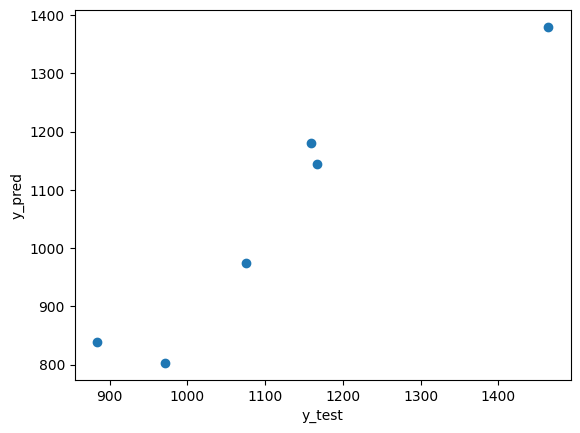

In [48]:
#Assumptions
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [49]:
residuals = y_test -y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


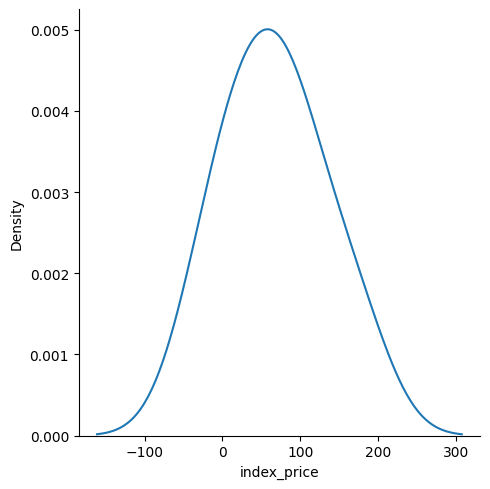

In [53]:
sns.displot(residuals,kind='kde')

Text(0, 0.5, 'residuals')

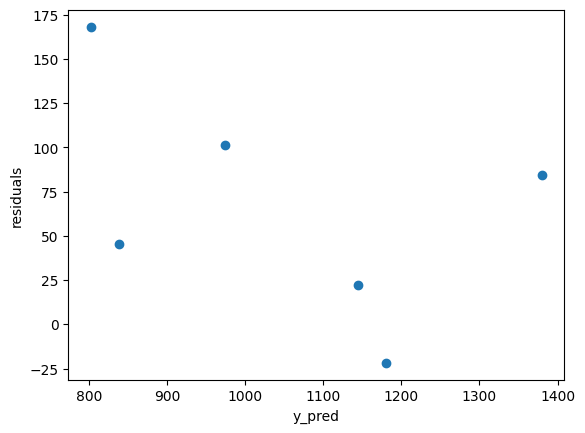

In [54]:
## scatter wrt prediction and residuals
plt.scatter(y_pred,residuals)
plt.xlabel('y_pred')
plt.ylabel('residuals')


In [55]:
%pip install statsmodels


In [59]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 09 Feb 2026   Prob (F-statistic):                       0.754
Time:                        08:25:12   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""